In [2]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
#Importação de dataset
df = pd.read_csv('/ead_etl/dataset.csv', sep=',')
df.head()

,id_pedido,data_pedido,id_cliente,genero_livro,titulo_livro,autor,preco_unitario,quantidade,cidade_cliente,estado_cliente
0,1001,2024-01-15,C879,Ficção Científica,Duna,Frank Herbert,55.9,2,São Paulo,SP
1,1002,2024-01-16,C123,Desenvolvimento Pessoal,O Poder do Hábito,Charles Duhigg,42.5,1,Rio de Janeiro,RJ
2,1003,2024-01-18,C543,Não-Ficção,Sapiens: Uma Breve História da Humanidade,Yuval Noah Harari,61.0,1,Belo Horizonte,MG
3,1004,2024-01-20,C879,Ficção Científica,O Guia do Mochileiro das Galáxias,Douglas Adams,38.0,3,São Paulo,SP
4,1005,2024-02-05,C321,Fantasia,O Senhor dos Anéis,J.R.R. Tolkien,75.0,1,Porto Alegre,RS


In [4]:
#Criar coluna nova com soma de 'preco_unitario' multiplicando por 'quantidade'
df['preco_total'] = df['preco_unitario'] * df['quantidade']
df.head()


,id_pedido,data_pedido,id_cliente,genero_livro,titulo_livro,autor,preco_unitario,quantidade,cidade_cliente,estado_cliente,preco_total
0,1001,2024-01-15,C879,Ficção Científica,Duna,Frank Herbert,55.9,2,São Paulo,SP,111.8
1,1002,2024-01-16,C123,Desenvolvimento Pessoal,O Poder do Hábito,Charles Duhigg,42.5,1,Rio de Janeiro,RJ,42.5
2,1003,2024-01-18,C543,Não-Ficção,Sapiens: Uma Breve História da Humanidade,Yuval Noah Harari,61.0,1,Belo Horizonte,MG,61.0
3,1004,2024-01-20,C879,Ficção Científica,O Guia do Mochileiro das Galáxias,Douglas Adams,38.0,3,São Paulo,SP,114.0
4,1005,2024-02-05,C321,Fantasia,O Senhor dos Anéis,J.R.R. Tolkien,75.0,1,Porto Alegre,RS,75.0


#ANÁLISE GERAL DE VENDAS

In [9]:
#Primeira Questão: Faturamento total
fat_total = df['preco_total'].sum()
print(f'O faturamento total foi de R${fat_total:.2f}')

O faturamento total foi de R$1759.70


In [ ]:
#Segunda Questão: Preço médio dos livros vendidos
pc_medio = df['preco_unitario'].mean()
print(pc_medio)

63.970000000000006


#DESEMPENHO GERAL DE GENEROS

In [ ]:
#Genêros mais vendidos
gen_vendidos = df.groupby('genero_livro')['quantidade'].sum().sort_values(ascending=False)
print(gen_vendidos)

genero_livro
Ficção Científica          7
Técnico                    7
Fantasia                   5
Não-Ficção                 5
Desenvolvimento Pessoal    4
Name: quantidade, dtype: int64


In [ ]:
#Receita por genero
rec_genero = df.groupby('genero_livro')['preco_total'].sum().sort_values(ascending=False)
print(rec_genero)

genero_livro
Técnico                    685.1
Ficção Científica          333.7
Não-Ficção                 302.0
Fantasia                   260.0
Desenvolvimento Pessoal    178.9
Name: preco_total, dtype: float64


<Axes: title={'center': 'Receita por Gênero'}, xlabel='Genero do livo', ylabel='Receita em R$'>

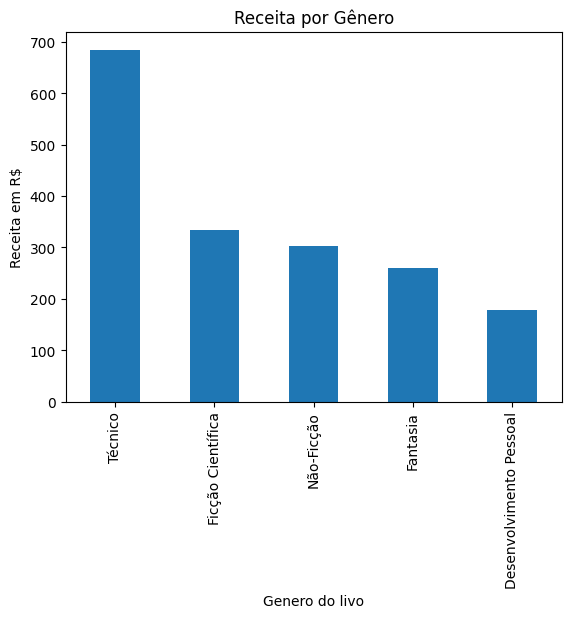

In [ ]:
#Grafico de barras para receita por genero
rec_genero.plot(kind='bar', title='Receita por Gênero', xlabel='Genero do livo', ylabel='Receita em R$')


In [ ]:
#Volume de venda por cidade
vol_vendas_cidade = df.groupby('cidade_cliente')['quantidade'].sum().sort_values(ascending=False)
print(vol_vendas_cidade.head(3))

cidade_cliente
São Paulo         12
Belo Horizonte     5
Porto Alegre       5
Name: quantidade, dtype: int64


In [ ]:
#Clientes unicos
clt_unicos = df['id_cliente'].nunique()
print(clt_unicos)

6


In [ ]:
#Clientes com maior faturamento
clt_fat = df.groupby('id_cliente')['preco_total'].sum().sort_values(ascending=False)
print(clt_fat.head(3))

id_cliente
C789    509.7
C879    401.2
C543    302.0
Name: preco_total, dtype: float64


In [ ]:

#Criar coluna mes/ano a partir da coluna "data_pedido"
df['data_pedido'] = pd.to_datetime(df['data_pedido'])
df['mes_ano'] = df['data_pedido'].dt.to_period('M')
df.head(5)


,id_pedido,data_pedido,id_cliente,genero_livro,titulo_livro,autor,preco_unitario,quantidade,cidade_cliente,estado_cliente,preco_total,mes_ano
0,1001,2024-01-15,C879,Ficção Científica,Duna,Frank Herbert,55.9,2,São Paulo,SP,111.8,2024-01
1,1002,2024-01-16,C123,Desenvolvimento Pessoal,O Poder do Hábito,Charles Duhigg,42.5,1,Rio de Janeiro,RJ,42.5,2024-01
2,1003,2024-01-18,C543,Não-Ficção,Sapiens: Uma Breve História da Humanidade,Yuval Noah Harari,61.0,1,Belo Horizonte,MG,61.0,2024-01
3,1004,2024-01-20,C879,Ficção Científica,O Guia do Mochileiro das Galáxias,Douglas Adams,38.0,3,São Paulo,SP,114.0,2024-01
4,1005,2024-02-05,C321,Fantasia,O Senhor dos Anéis,J.R.R. Tolkien,75.0,1,Porto Alegre,RS,75.0,2024-02


<Axes: title={'center': 'Evolução do Faturamento Mensal'}, xlabel='Mês/Ano', ylabel='Faturamento em R$'>

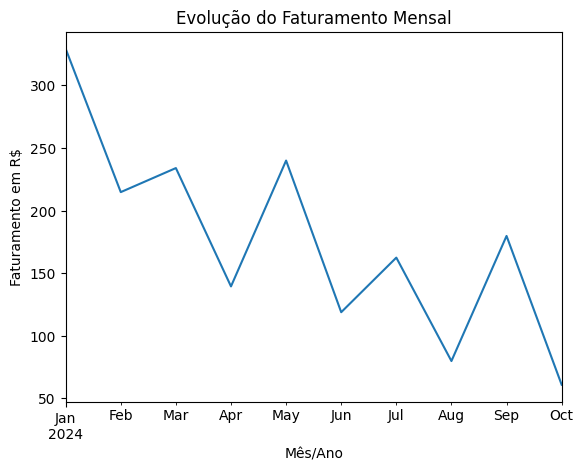

In [ ]:
evol_mes_ano = df.groupby('mes_ano')['preco_total'].sum()
evol_mes_ano.plot(kind='line', title='Evolução do Faturamento Mensal', xlabel='Mês/Ano', ylabel='Faturamento em R$')

In [ ]:
#Livros mais vendidos em quantidade
livros_vendidos = df.groupby('titulo_livro')['quantidade'].sum().sort_values(ascending=False)
print(livros_vendidos.head(3))

titulo_livro
Duna                                 3
O Guia do Mochileiro das Galáxias    3
O Hobbit                             3
Name: quantidade, dtype: int64


In [ ]:
autor_mais_vendido = df.groupby('autor')['quantidade'].sum().sort_values(ascending=False)
print(autor_mais_vendido.head(3))

autor
Yuval Noah Harari    5
J.R.R. Tolkien       4
Douglas Adams        3
Name: quantidade, dtype: int64
